In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
url = 'https://raw.githubusercontent.com/MichaelV3T3R/MV-AIE-2025/master/homeworks/HW02/S02-hw-dataset.csv'
df = pd.read_csv(url, sep = ',')
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [110]:
df.head(n = 10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [111]:
df.shape

(41, 5)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [113]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [114]:
print('Кол-во пропусков:\n', df.isna().sum())
print('\n')
print('Процент пропусков:\n', df.isna().mean())

Кол-во пропусков:
 user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64


Процент пропусков:
 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [115]:
print('Кол-во дубликатов:', df.duplicated().sum())

Кол-во дубликатов: 1


In [116]:
print('Процент дубликатов:', df.duplicated().mean())

Процент дубликатов: 0.024390243902439025


In [117]:
print('Подозрительные данные (ВОЗРАСТ):\n')
print(df[df['age'] < 18])
print(df[df['age'] >= 100])

Подозрительные данные (ВОЗРАСТ):

    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [118]:
print('Подозрительные данные (ПОКУПКИ И ДЕНЬГИ):\n')
print(df[df['purchases'] < 0])
print(df[df['revenue'] < 0])
print(df[(df['purchases'] != 0) & (df['revenue'] == 0)])

Подозрительные данные (ПОКУПКИ И ДЕНЬГИ):

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [119]:
print('Коректные данные:')
niceDATA = df.copy() # Избавляемся от дубликатов
niceDATA.drop_duplicates(inplace = True)
niceDATA.dropna(inplace = True)
niceDATA.drop(niceDATA[niceDATA['age'] < 18].index, inplace = True)
niceDATA.drop(niceDATA[niceDATA['purchases'] < 0].index, inplace = True)
niceDATA.drop(niceDATA[niceDATA['revenue'] < 0].index, inplace = True)
niceDATA.drop(niceDATA[(niceDATA['purchases'] != 0) & (niceDATA['revenue'] == 0)].index, inplace = True)

niceDATA.info()

Коректные данные:
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 39
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    35 non-null     int64  
 1   age        35 non-null     float64
 2   country    35 non-null     object 
 3   purchases  35 non-null     int64  
 4   revenue    35 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ KB


#### Вывод после анализа данных:  
Датасет `S02-hw-dataset.csv` содержит 41 запись, из них 40 уникальных и 1 дубликат, имеется 2 пропуска данных в группе `age`.  
Атрибут `age` содержит 1 запись с подозрительным значением, кроме пустых значений.  
Атрибут `country` не содержит подозрительных записей.  
Атрибуты `purchases` и `revenue` имеют 1 подозрительную запись.  

В результате обработки данных, то есть очистки от дубликатов и подозрительных записей, получилось 35 чистых записей, что позволяет нам сделать следующий вывод:  
Данные нуждались в минимальной обработке. После очистки данные пригодны для анализа.

In [120]:
niceDATA

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652
13,14,36.0,DE,9,2358


In [121]:
niceDATA['country'].value_counts()

country
FR    11
RU    11
US     6
DE     5
CN     2
Name: count, dtype: int64

In [122]:
print('Сумма покупок в каждой стране:\n', niceDATA.groupby(['country'])['purchases'].sum())
print('\n')
print('Процент покупок в каждой стране:\n', niceDATA.groupby(['country'])['purchases'].mean())

Сумма покупок в каждой стране:
 country
CN     9
DE    33
FR    52
RU    47
US    24
Name: purchases, dtype: int64


Процент покупок в каждой стране:
 country
CN    4.500000
DE    6.600000
FR    4.727273
RU    4.272727
US    4.000000
Name: purchases, dtype: float64


In [123]:
print('Сумма дохода в каждой стране:\n', niceDATA.groupby(['country'])['revenue'].sum())
print('\n')
print('Процент дохода в каждой стране:\n', niceDATA.groupby(['country'])['revenue'].mean())

Сумма дохода в каждой стране:
 country
CN    2108
DE    7377
FR    7326
RU    8272
US    3829
Name: revenue, dtype: int64


Процент дохода в каждой стране:
 country
CN    1054.000000
DE    1475.400000
FR     666.000000
RU     752.000000
US     638.166667
Name: revenue, dtype: float64


In [124]:
nDb = pd.cut(niceDATA['age'], bins = 5)
niceDATA['ageG'] = nDb

In [125]:
niceDATA['ageG'].value_counts()

ageG
(17.961, 25.8]    9
(25.8, 33.6]      8
(33.6, 41.4]      6
(41.4, 49.2]      6
(49.2, 57.0]      6
Name: count, dtype: int64

In [126]:
print('Сумма покупок в возрасте:\n', niceDATA.groupby(['ageG'])['purchases'].sum())
print('\n')
print('Процент покупок в возрасте:\n', niceDATA.groupby(['ageG'])['purchases'].mean())

Сумма покупок в возрасте:
 ageG
(17.961, 25.8]    43
(25.8, 33.6]      39
(33.6, 41.4]      35
(41.4, 49.2]      18
(49.2, 57.0]      30
Name: purchases, dtype: int64


Процент покупок в возрасте:
 ageG
(17.961, 25.8]    4.777778
(25.8, 33.6]      4.875000
(33.6, 41.4]      5.833333
(41.4, 49.2]      3.000000
(49.2, 57.0]      5.000000
Name: purchases, dtype: float64


C:\Users\imagi\AppData\Local\Temp\ipykernel_24628\3648511913.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Сумма покупок в возрасте:\n', niceDATA.groupby(['ageG'])['purchases'].sum())
C:\Users\imagi\AppData\Local\Temp\ipykernel_24628\3648511913.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Процент покупок в возрасте:\n', niceDATA.groupby(['ageG'])['purchases'].mean())


In [127]:
print('Сумма дохода в возрасте:\n', niceDATA.groupby(['ageG'])['revenue'].sum())
print('\n')
print('Процент дохода в возрасте:\n', niceDATA.groupby(['ageG'])['revenue'].mean())

Сумма дохода в возрасте:
 ageG
(17.961, 25.8]    6409
(25.8, 33.6]      7261
(33.6, 41.4]      7654
(41.4, 49.2]      4008
(49.2, 57.0]      3580
Name: revenue, dtype: int64


Процент дохода в возрасте:
 ageG
(17.961, 25.8]     712.111111
(25.8, 33.6]       907.625000
(33.6, 41.4]      1275.666667
(41.4, 49.2]       668.000000
(49.2, 57.0]       596.666667
Name: revenue, dtype: float64


C:\Users\imagi\AppData\Local\Temp\ipykernel_24628\1016010944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Сумма дохода в возрасте:\n', niceDATA.groupby(['ageG'])['revenue'].sum())
C:\Users\imagi\AppData\Local\Temp\ipykernel_24628\1016010944.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Процент дохода в возрасте:\n', niceDATA.groupby(['ageG'])['revenue'].mean())


Создание нового категориального признака, `Принадлежность к одной из 5 возрастных групп`.
Для переменных `country` и `ageG` были посчитаны частоты, в результате чего стало понятно, что в выборке доминируют данные о  пользователях из `RU` (Россия) и `FR` (Франция) и практически не встречаються записи о пользователях из `CN` (Китай).  
Также в выборке доминируют записи о пользователях с возрастом от 18 до 26 и от 34 до 41. А у возрастной группы `49` - `57` самый маленький доход из всех.    
Для двух категориальныхх переменных был посчитан средний доход и общее кол-во покупок, это показало, что кол-во покупок сильно коррелирует с кол-во записей из этой группы и не дает в полной мере оценить картину.

Поэтому было посчитано среднее кол-во в каждой группе и были установленны следующие закономерности:
1) Пользователи из `DE` (Германия) имеют в среднем доход выше, чем у пользователей из другой страны, так же и кол-во покупок выше, чем у остальных.
2) Пользователи возрастной группы `49` - `57` имеют маленький процент дохода при том, что число покупок не так мало, как у возрастной группы `41` - `49`.
3) Так как я взял обработанный датасет, который носит название `niceDATA`, то у меня нет анамальных значений, какие были бы, если б я взял старый датасет `df`.

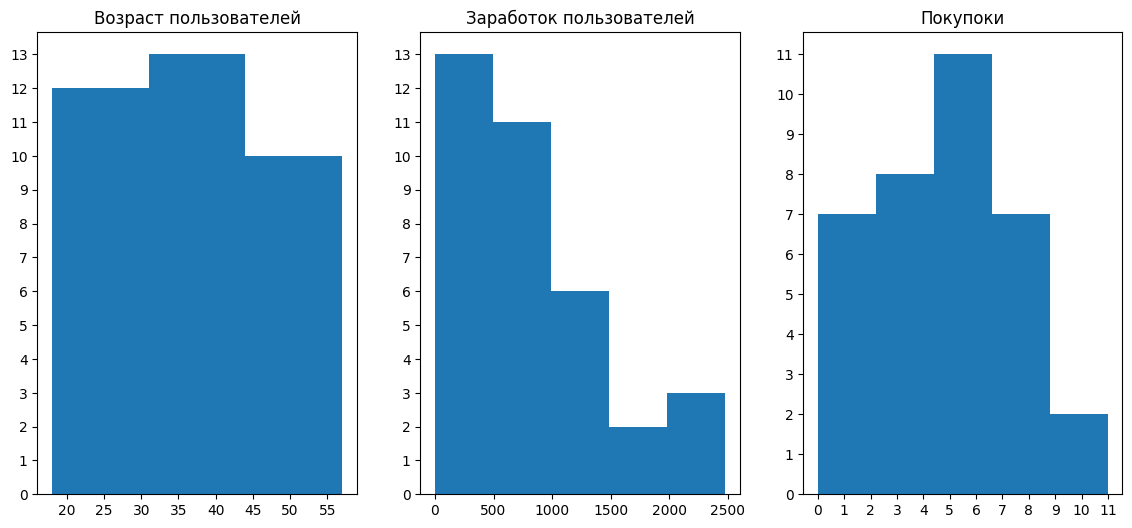

In [131]:
def binsCount(ser):
    IQR = ser.quantile(0.75) - ser.quantile(0.25)
    i = len(ser)
    return int((ser.max() - ser.min()) / (2 * IQR * i**(-1/3))) 


fig, (axAge, axRevenue, axPurchases) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 6))

axAge.hist(niceDATA['age'], bins = binsCount(niceDATA['age']))
axAge.set_title('Возраст пользователей')
axAge.locator_params(axis = 'x', nbins = 12)
axAge.locator_params(axis = 'y', nbins = 15)

axRevenue.hist(niceDATA['revenue'], bins = binsCount(niceDATA['revenue']))
axRevenue.set_title('Заработок пользователей')
axRevenue.locator_params(axis = 'x', nbins = 10)
axRevenue.locator_params(axis = 'y', nbins = 16)

axPurchases.hist(niceDATA['purchases'], bins = binsCount(niceDATA['purchases']))
axPurchases.set_title('Покупоки')
axPurchases.locator_params(axis = 'x', nbins = 14)
axPurchases.locator_params(axis = 'y', nbins = 17)

plt.savefig("GistaGramm")
plt.show()

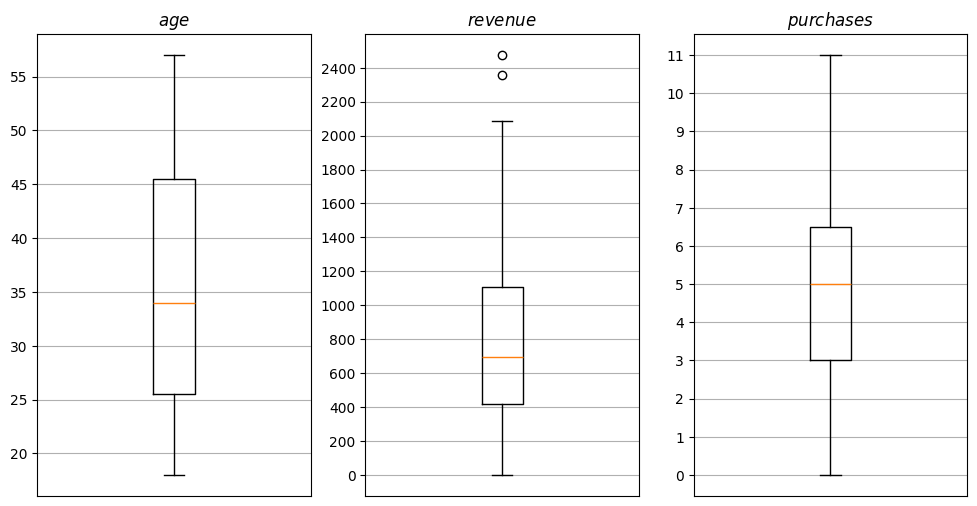

In [132]:
fig, (axAge, axRevenue, axPurchases) = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 6))

axAge.boxplot(niceDATA['age'][niceDATA['age'].notna()])
axAge.set_title('$age$')
axAge.grid()
axAge.xaxis.set_visible(False)
axAge.locator_params(axis = 'y', nbins = 14)

axRevenue.boxplot(niceDATA['revenue'])
axRevenue.set_title('$revenue$')
axRevenue.grid()
axRevenue.xaxis.set_visible(False)
axRevenue.locator_params(axis = 'y', nbins = 14)

axPurchases.boxplot(niceDATA['purchases'])
axPurchases.set_title('$purchases$')
axPurchases.grid()
axPurchases.xaxis.set_visible(False)
axPurchases.locator_params(axis = 'y', nbins = 14)

plt.savefig('BoxPlot')
plt.show()

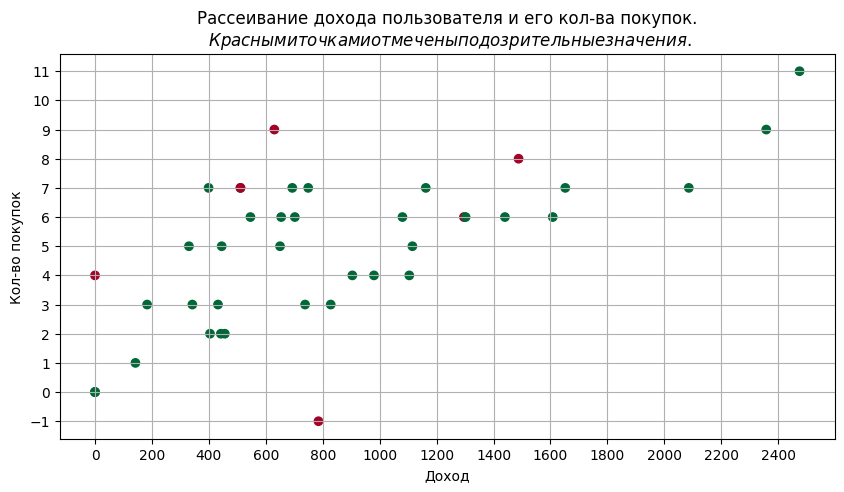

In [137]:
fig, axRevPur = plt.subplots(figsize=(10, 5))

axRevPur.scatter(y = df['purchases'], x = df['revenue'], c = df.index.isin(niceDATA.index), cmap='RdYlGn')
axRevPur.set_xlabel('Доход')
axRevPur.set_ylabel('Кол-во покупок')
axRevPur.set_title('Рассеивание дохода пользователя и его кол-ва покупок.\n $Красными точками отмечены подозрительные значения.$')

axRevPur.locator_params(axis = 'y', nbins = 14)
axRevPur.locator_params(axis = 'x', nbins = 14)
axRevPur.grid()

plt.savefig('DotScatter')
plt.show()

# `ВСЕ`